<h1 align=center><font size = 7>FINAL PROJECT</font></h1>


##### *JORDI ENAL AMBAT | DBA2300726 | GROUP 106*

**ANALISIS STATISTIK DIGITAL PRODUK**

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
maindata = pd.read_csv("/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/_product.csv")
browser = pd.read_csv('/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/browser.csv')
event_type = pd.read_csv('/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/event_type.csv')
traffic = pd.read_csv('/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/traffic.csv')

### Main Data

In [ ]:
maindata.head(5)

,user_id,session_id,sequence_number,traffic_source,browser,event_type
0,96341.0,78db677a-565b-4c67-b47e-a49381c19d0f,1.0,Search,Chrome,home
1,97444.0,6df1cc69-d3b4-44ca-8c49-4978a98055aa,1.0,Search,Chrome,home
2,98686.0,73855a2c-6581-4703-8feb-8d4e02207a15,1.0,Search,Chrome,home
3,13431.0,96240a7c-37b5-481d-9b79-075cfd4dd274,1.0,Search,Chrome,home
4,49921.0,f679284e-c376-41a2-ae7e-6bc951021099,1.0,Organic,IE,home


#### Browser

In [ ]:
browser.head(5)

,browser,session,sequence
0,Chrome,645966,645966
1,Firefox,260167,260167
2,IE,65171,65171
3,Other,64392,64392
4,Safari,257540,257540


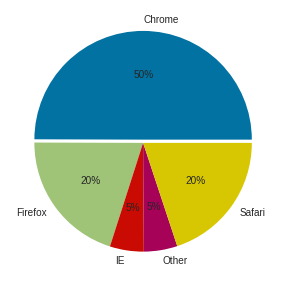

In [ ]:
plt.figure(figsize=(5,5))
labels = ['Chrome','Firefox','IE','Other','Safari']
values = [645966, 260167, 65171, 64392, 257540]
explode = [0.03,0,0,0,0]
plt.pie(values, labels=labels, autopct='%.f%%', explode=explode)
plt.show()

In [ ]:
browser1 = browser.drop(columns=['sequence'])
browser1 = browser1.T
browser1.head(5)

,0,1,2,3,4
browser,Chrome,Firefox,IE,Other,Safari
session,645966,260167,65171,64392,257540


In [ ]:
new_header = browser1.iloc[0] #grab the first row for the header
browser1 = browser1[1:] #take the data less the header row
browser1.columns = new_header #set the header row as the df header

In [ ]:
browser1.describe()

browser,Chrome,Firefox,IE,Other,Safari
count,1,1,1,1,1
unique,1,1,1,1,1
top,645966,260167,65171,64392,257540
freq,1,1,1,1,1


In [ ]:
browser.describe()

,session,sequence
count,5.000000,5.000000
mean,258647.200000,258647.200000
std,237269.631016,237269.631016
min,64392.000000,64392.000000
25%,65171.000000,65171.000000
50%,257540.000000,257540.000000
75%,260167.000000,260167.000000
max,645966.000000,645966.000000


#### Event Type

In [ ]:
event_type.head(5)

,event_type,session,sequence
0,cart,341886,341886
1,department,341886,341886
2,home,87070,87070
3,product,341886,341886
4,purchase,180508,180508


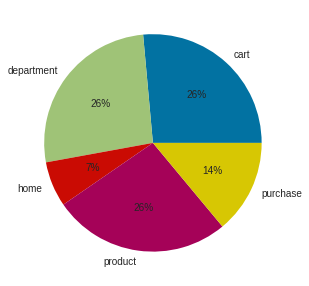

In [ ]:
plt.figure(figsize=(5,5))
labels = event_type['event_type']
values = event_type['sequence']
explode = [0,0,0,0,0]
plt.pie(values, labels=labels, autopct='%.f%%', explode=explode)
plt.show()

In [ ]:
event_type1 = event_type.drop(columns=['sequence'])
event_type1 = event_type1.T
event_type1.head(5)

,0,1,2,3,4
event_type,cart,department,home,product,purchase
session,341886,341886,87070,341886,180508


#### Traffic

In [ ]:
traffic.head(5)

,traffic_source,session,sequence
0,Display,51565,51565
1,Email,62495,62495
2,Facebook,79956,79956
3,Organic,192276,192276
4,Search,906944,906944


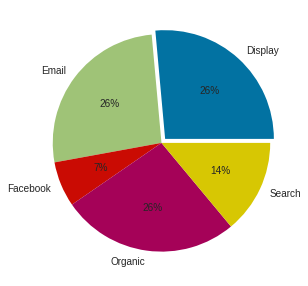

In [ ]:
plt.figure(figsize=(5,5))
labels = traffic['traffic_source']
values = event_type['sequence']
explode = [0.05,0,0,0,0]
plt.pie(values, labels=labels, autopct='%.f%%', explode=explode)
plt.show()

In [ ]:
traffic1 = traffic.drop(columns=['sequence'])
traffic1 = traffic1.T
traffic1.head(5)

,0,1,2,3,4
traffic_source,Display,Email,Facebook,Organic,Search
session,51565,62495,79956,192276,906944


#### CP4


In [ ]:
maindata1 = pd.read_csv("/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/digitalproduct.csv")

In [ ]:
maindata1.head(10)

,user_id,session_id,sequence_number,traffic_source,browser,event_type,url
0,96341.0,78db677a-565b-4c67-b47e-a49381c19d0f,1.0,Search,Chrome,home,/home
1,97444.0,6df1cc69-d3b4-44ca-8c49-4978a98055aa,1.0,Search,Chrome,home,/home
2,98686.0,73855a2c-6581-4703-8feb-8d4e02207a15,1.0,Search,Chrome,home,/home
3,13431.0,96240a7c-37b5-481d-9b79-075cfd4dd274,1.0,Search,Chrome,home,/home
4,49921.0,f679284e-c376-41a2-ae7e-6bc951021099,1.0,Organic,IE,home,/home
5,52520.0,d2e8cda4-b314-4055-8f9e-fc8cb62472cb,1.0,Organic,Chrome,home,/home
6,683.0,4c2fada8-7095-4de2-9728-31c0eed658b0,1.0,Email,Chrome,home,/home
7,709.0,5a9c26be-01e9-4918-a908-77476667faa2,1.0,Search,IE,home,/home
8,1956.0,94f14c0e-7b60-49da-9958-e9422a360959,1.0,Display,Firefox,home,/home
9,84442.0,4de51f07-3a7b-42d6-b29f-9249d5bd1b38,1.0,Email,Chrome,home,/home


## Proceed


In [ ]:
product_detail = pd.read_csv("/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/_prodtl.csv")
pricecost = pd.read_csv("/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/_pricecost.csv")
detail_user = pd.read_csv("/content/drive/MyDrive/MSIB DBA/FINAL PROJECT/proceed/_detailuser.csv")

In [ ]:
product_detail.head(5)

,product_id,name,category,brand,department,created_at,shipped_at,delivered_at,returned_at,sold_at
0,25187,SockGuy Men's Kokopelli Socks,Socks,NaN,Men,2021-04-04 07:29:16,2021-04-06 18:05:00,2021-04-07 11:32:00,2021-04-10 07:57:00,2022-02-12 22:34:25
1,25187,SockGuy Men's Kokopelli Socks,Socks,NaN,Men,2020-12-29 08:39:44,2020-12-26 19:06:00,2020-12-29 01:42:00,2020-12-31 19:31:00,2022-02-12 22:34:25
2,25187,SockGuy Men's Kokopelli Socks,Socks,NaN,Men,2022-02-12 22:34:25,2022-02-15 16:05:00,2022-02-17 17:02:00,NaN,2022-02-12 22:34:25
3,25187,SockGuy Men's Kokopelli Socks,Socks,NaN,Men,2022-04-03 23:41:51,2022-04-02 03:42:00,NaN,NaN,2022-02-12 22:34:25
4,25187,SockGuy Men's Kokopelli Socks,Socks,NaN,Men,2022-03-29 00:46:14,2022-03-30 04:32:00,NaN,NaN,2022-02-12 22:34:25


In [ ]:
pricecost.head(5)

,product_id,retail_price,cost,sale_price
0,16898.0,25.0,13.925,25.0
1,16898.0,25.0,13.925,25.0
2,16898.0,25.0,13.925,25.0
3,16898.0,25.0,13.925,25.0
4,16898.0,25.0,13.925,25.0


In [ ]:
detail_user.head(5)

,user_id,fullname,age,gender,street_address,postal_code,city,state,country,created_at,delivered_at
0,9230,Dawn Garrison,44,F,3016 Kelly Spurs,111003,Hefei,Liaoning,China,2022-05-31 08:55:48.353609,NaN
1,84559,Jose Wilson,50,M,018 Valdez Lane Suite 567,4077,Brisbane,Queensland,Australia,2021-10-12 07:11:30,2021-10-14 01:20:00
2,95143,Matthew Hendricks,32,M,9418 Acosta Via,516300,Beijing,Guangdong,China,2022-02-15 12:13:03,NaN
3,21978,Javier Garza,56,M,00756 Brown Island Apt. 837,75010,Carrollton,Texas,United States,2021-09-29 13:50:43,2021-10-03 01:21:00
4,50872,David Parker,12,M,07049 Massey Stream,60025,Glenview,Illinois,United States,2022-03-25 01:00:38,NaN


#### Numerical & Categorical

In [ ]:
numerical_features_pricecost = pricecost.select_dtypes(include="number").columns.tolist()
categorical_features_pricecost = pricecost.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
print(numerical_features_pricecost)
print("Categorical features:")
print(categorical_features_pricecost)

Numerical features:
['product_id', 'retail_price', 'cost', 'sale_price']
Categorical features:
[]


In [ ]:
categorical_features_product_detail = product_detail.select_dtypes(include="object").columns.tolist()
print("Categorical features:")
print(categorical_features_product_detail)

Categorical features:
['name', 'category', 'brand', 'department', 'created_at', 'shipped_at', 'delivered_at', 'returned_at', 'sold_at']


In [ ]:
categorical_detail_user = detail_user.select_dtypes(include="object").columns.tolist()
print("Categorical features:")
print(categorical_detail_user)

Categorical features:
['fullname', 'gender', 'street_address', 'postal_code', 'city', 'state', 'country', 'created_at', 'delivered_at']


#### Describe

In [ ]:
product_detail[categorical_features_product_detail].describe().T

,count,unique,top,freq
name,3544241,27309,7 For All Mankind Men's Standard Classic Strai...,1655
category,3544451,26,Jeans,255186
brand,3541890,2756,Allegra K,112496
department,3544451,2,Men,1933401
created_at,3544381,180172,2022-01-22 02:46:33,73
shipped_at,2307687,77625,2022-02-28 20:46:00,190
delivered_at,1236836,42494,2021-07-07 02:56:00,233
returned_at,345835,12065,2022-04-15 02:02:00,153
sold_at,1312796,180172,2021-11-30 16:27:05,26


In [ ]:
detail_user[categorical_detail_user].describe().T

,count,unique,top,freq
fullname,200522,69147,Michael Smith,119
gender,200522,2,M,100518
street_address,200522,99999,596 Daniel Isle Apt. 452,13
postal_code,200522,15672,02675-031,934
city,198553,7925,Shanghai,4905
state,200522,228,Guangdong,10445
country,200522,15,China,68295
created_at,180508,180172,2022-03-10 07:49:24,3
delivered_at,63035,42494,2021-07-07 02:56:00,8


In [ ]:
pricecost[numerical_features_pricecost].describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,3544381.0,15921.401115,8348.472881,1.0000,8841.000000,17107.00000,23039.000000,29120.000000
retail_price,3544451.0,60.298377,65.884761,0.0200,24.969999,40.00000,69.989998,999.000000
cost,3544451.0,28.999760,30.664825,0.0083,11.500000,20.25674,34.910241,557.151002
sale_price,3544381.0,60.298489,65.884925,0.0200,24.969999,40.00000,69.989998,999.000000


#### Tipe Data

In [ ]:
product_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544451 entries, 0 to 3544450
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   product_id    int64 
 1   name          object
 2   category      object
 3   brand         object
 4   department    object
 5   created_at    object
 6   shipped_at    object
 7   delivered_at  object
 8   returned_at   object
 9   sold_at       object
dtypes: int64(1), object(9)
memory usage: 270.4+ MB


In [ ]:
from datetime import datetime, date 

product_detail['created_at'] = pd.to_datetime(product_detail['created_at'], format = '%Y-%m-%d %H:%M:%S')
product_detail['shipped_at'] = pd.to_datetime(product_detail['shipped_at'], format = '%Y-%m-%d %H:%M:%S')
product_detail['delivered_at'] = pd.to_datetime(product_detail['delivered_at'], format = '%Y-%m-%d %H:%M:%S')
product_detail['returned_at'] = pd.to_datetime(product_detail['returned_at'], format = '%Y-%m-%d %H:%M:%S')
product_detail['sold_at'] = pd.to_datetime(product_detail['sold_at'], format = '%Y-%m-%d %H:%M:%S')
detail_user['created_at'] = pd.to_datetime(detail_user['created_at'], format = '%Y-%m-%d %H:%M:%S')
detail_user['delivered_at'] = pd.to_datetime(detail_user['delivered_at'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
product_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544451 entries, 0 to 3544450
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   product_id    int64         
 1   name          object        
 2   category      object        
 3   brand         object        
 4   department    object        
 5   created_at    datetime64[ns]
 6   shipped_at    datetime64[ns]
 7   delivered_at  datetime64[ns]
 8   returned_at   datetime64[ns]
 9   sold_at       datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(4)
memory usage: 270.4+ MB


In [ ]:
detail_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200522 entries, 0 to 200521
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         200522 non-null  int64         
 1   fullname        200522 non-null  object        
 2   age             200522 non-null  int64         
 3   gender          200522 non-null  object        
 4   street_address  200522 non-null  object        
 5   postal_code     200522 non-null  object        
 6   city            198553 non-null  object        
 7   state           200522 non-null  object        
 8   country         200522 non-null  object        
 9   created_at      180508 non-null  datetime64[ns]
 10  delivered_at    63035 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 16.8+ MB


#### Handling Missing

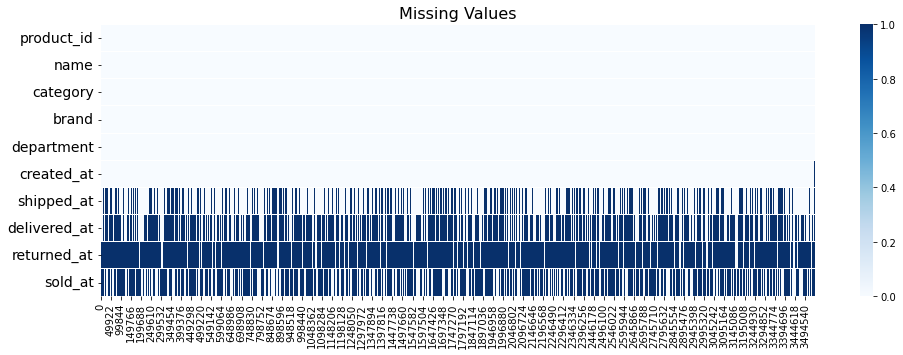

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(product_detail.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [ ]:
print(product_detail['created_at'].value_counts())
print(product_detail['shipped_at'].value_counts())
print(product_detail['delivered_at'].value_counts())
print(product_detail['sold_at'].value_counts())
print(product_detail['returned_at'].value_counts())

2022-01-22 02:46:33    73
2021-11-30 16:27:05    71
2022-03-10 11:34:01    68
2022-04-03 04:03:43    66
2022-03-31 20:42:32    65
                       ..
2019-09-20 03:34:16     2
2021-02-10 08:35:22     2
2022-02-23 01:16:26     2
2021-05-31 23:34:26     2
2022-03-26 13:44:55     2
Name: created_at, Length: 180172, dtype: int64
2022-02-28 20:46:00    190
2022-05-25 22:30:00    178
2022-01-06 19:57:00    173
2021-02-24 02:43:00    169
2021-06-26 00:40:00    166
                      ... 
2021-11-04 12:53:00      2
2022-03-06 04:33:00      2
2022-02-25 16:31:00      2
2021-10-28 03:40:00      2
2022-03-29 10:58:00      2
Name: shipped_at, Length: 77625, dtype: int64
2021-07-07 02:56:00    233
2020-03-17 23:35:00    185
2020-12-25 05:36:00    184
2022-04-25 02:51:00    173
2022-05-07 08:15:00    156
                      ... 
2020-08-23 23:25:00      2
2022-05-27 12:05:00      2
2021-11-03 10:52:00      2
2020-11-30 11:21:00      2
2021-04-06 04:38:00      2
Name: delivered_at, Length:

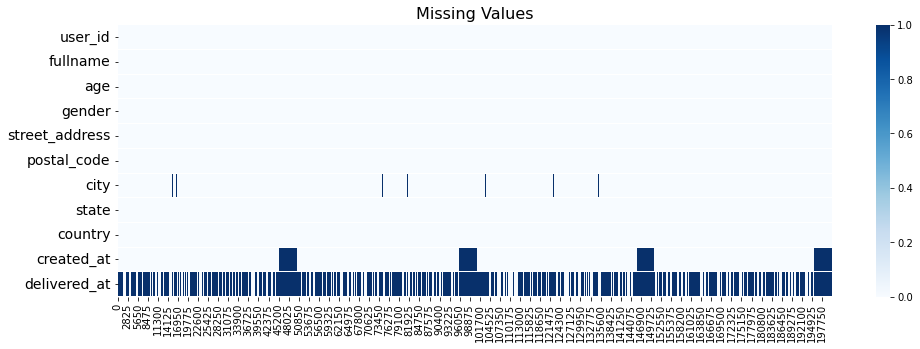

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(detail_user.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [ ]:
print(detail_user['created_at'].value_counts())
print(detail_user['delivered_at'].value_counts())

2022-03-10 07:49:24    3
2022-05-25 00:36:58    2
2021-05-19 02:37:20    2
2021-08-20 01:33:46    2
2021-07-30 10:04:23    2
                      ..
2021-07-07 15:54:05    1
2022-01-29 07:28:19    1
2021-06-28 15:07:30    1
2021-09-07 13:37:17    1
2021-12-13 05:53:52    1
Name: created_at, Length: 180172, dtype: int64
2021-07-07 02:56:00    8
2020-03-17 23:35:00    8
2022-04-25 02:51:00    8
2022-05-07 08:15:00    8
2022-03-13 03:23:00    7
                      ..
2022-01-28 00:33:00    1
2021-11-16 19:46:00    1
2021-10-15 16:50:00    1
2022-01-22 04:38:00    1
2021-01-12 10:41:00    1
Name: delivered_at, Length: 42494, dtype: int64


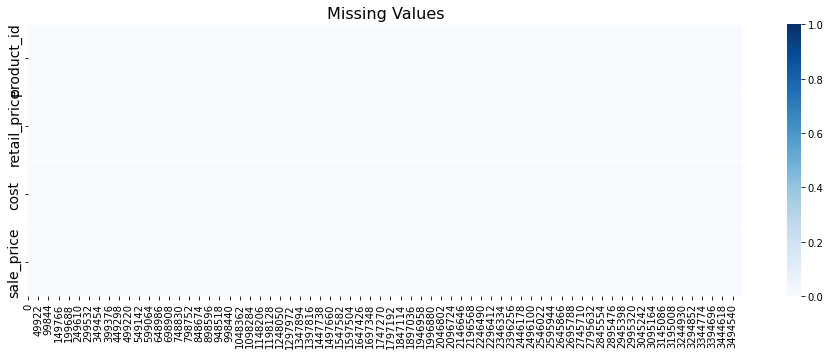

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(pricecost.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

#### Box Plot

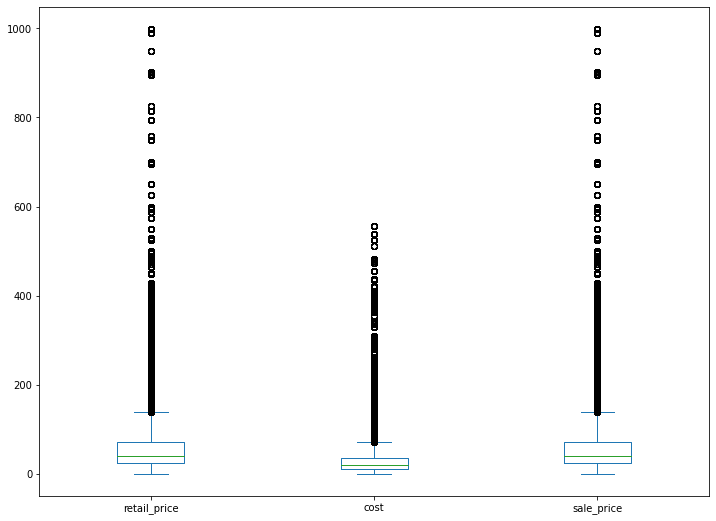

In [ ]:
pricecost_outlier = pd.Series(['retail_price','cost','sale_price'])
pricecost[pricecost_outlier].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

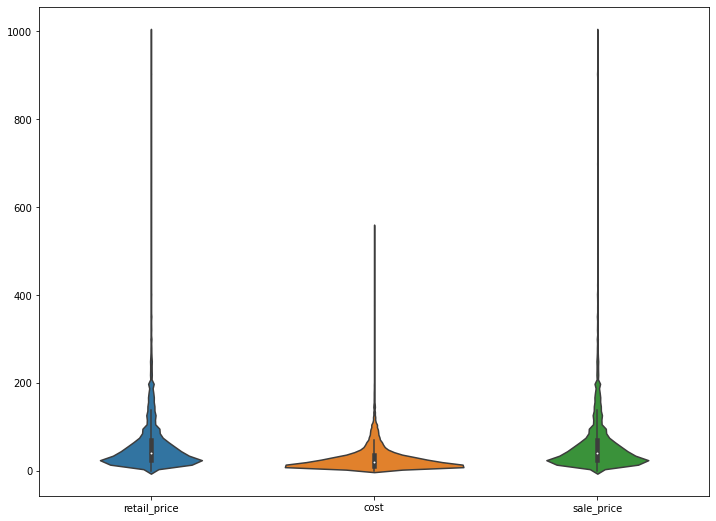

In [ ]:
plt.figure(figsize=(12, 9))
sns.violinplot(data=pricecost[pricecost_outlier])
plt.grid(False)
plt.show()

#### Correlation

In [ ]:
pricecost.corr()

,product_id,retail_price,cost,sale_price
product_id,1.000000,0.000890,-0.006808,0.000890
retail_price,0.000890,1.000000,0.982428,1.000000
cost,-0.006808,0.982428,1.000000,0.982428
sale_price,0.000890,1.000000,0.982428,1.000000


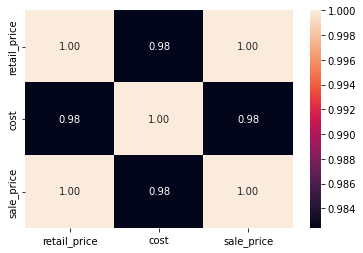

In [ ]:
sns.heatmap(pricecost[pricecost_outlier].corr(), annot=True, fmt=".2f")
plt.show()

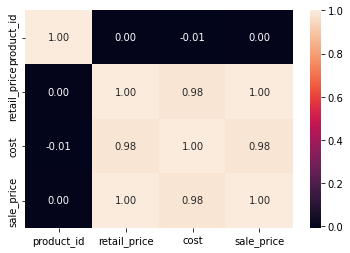

In [ ]:
sns.heatmap(pricecost.corr(), annot=True, fmt=".2f")
plt.show()

#### Number of Unique Value

In [ ]:
detail_user[categorical_detail_user].nunique()

fullname           69147
gender                 2
street_address     99999
postal_code        15672
city                7925
state                228
country               15
created_at        180172
delivered_at       42494
dtype: int64

In [ ]:
for feature in categorical_detail_user:
    print(detail_user[categorical_detail_user].value_counts())

fullname         gender  street_address                postal_code  city              state                          country      created_at           delivered_at       
Patrick Medina   M       316 Mills Land                750000       Shenzhen          Ningxia Hui Autonomous Region  China        2022-05-26 07:08:08  2022-05-29 05:33:00    2
Aaron Alvarez    M       159 Chen Fall                 138-042      Seoul             Seoul                          South Korea  2020-12-24 02:59:41  2020-12-27 19:35:00    1
Megan Doyle      F       39538 Davis Mission           63100        Clermont-Ferrand  Auvergne-Rhône-Alpes           France       2020-09-13 05:46:45  2020-09-17 05:47:00    1
Megan Christian  F       645 Hansen Motorway Apt. 346  101199       Beijing           Beijing                        China        2021-10-13 02:24:18  2021-10-19 07:02:00    1
                                                                                                                             

In [ ]:
product_detail[categorical_features_product_detail].nunique()

name             27309
category            26
brand             2756
department           2
created_at      180172
shipped_at       77625
delivered_at     42494
returned_at      12065
sold_at         180172
dtype: int64

In [ ]:
for feature in categorical_features_product_detail:
    print(product_detail[categorical_features_product_detail].value_counts())

name                                                          category                       brand          department  created_at           shipped_at           delivered_at         returned_at          sold_at            
!iT Jeans Women's Bonaroo Slouch Shorts                       Shorts                         !it Jeans      Women       2022-05-13 23:58:53  2022-05-17 01:04:00  2022-05-21 04:30:00  2022-05-21 09:55:00  2019-12-31 13:54:01    1
Nomis NHL3 Hoodie Penguins Black Mens                         Fashion Hoodies & Sweatshirts  Nomis          Men         2022-01-14 10:39:39  2022-01-14 01:17:00  2022-01-14 13:02:00  2022-01-15 02:30:00  2021-12-11 09:28:57    1
Nomis Rogue Shorts Black Mens                                 Shorts                         Nomis          Men         2019-05-29 07:05:46  2019-05-30 09:13:00  2019-06-01 01:30:00  2019-06-03 00:44:00  2021-04-21 04:17:06    1
                                                                                         

#### Vis

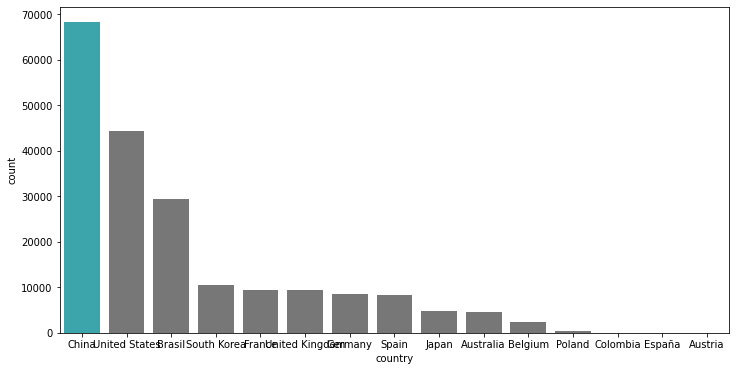

In [ ]:
def plot_count(x, data=detail_user, palette=None, figsize=(12, 6)):
    column_order = data[x].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, data=data, order=column_order,
        palette=palette
    )
    plt.grid(False)
    plt.show()

country_vis = detail_user["country"].value_counts().index
plot_count("country", palette=["#29B5BF"] + (len(country_vis)-1)*["#777777"])

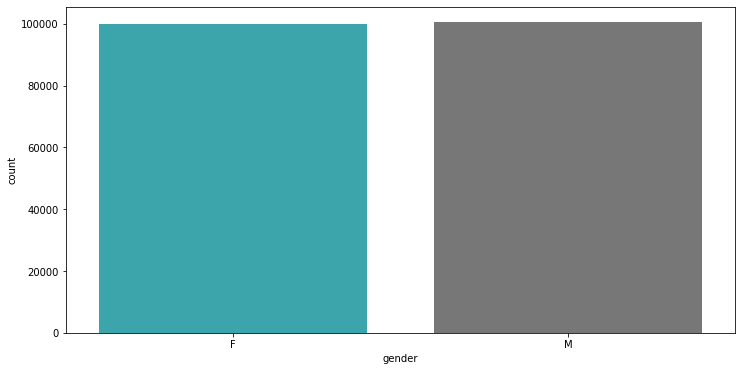

In [ ]:
gender_vis = detail_user.gender.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="gender",
    data=detail_user,
    palette=["#29B5BF"] + (len(gender_vis)-1)*["#777777"]
)
plt.grid(False)
plt.show()